# Task 2 Innomatics Lab

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('movies.csv')

## Shape of movies.csv

In [4]:
movies.shape

(9742, 3)

In [5]:
ratings = pd.read_csv('ratings.csv')

## Shape of ratings.csv

In [6]:
ratings.shape

(100836, 4)

## unique "userId" available in "ratings.csv"

In [7]:
ratings['userId'].nunique()

610

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## movie that has recieved maximum number of user ratings

In [13]:
merged_data = pd.merge(ratings, movies, on='movieId')
ratings_count = merged_data.groupby('title').size().reset_index(name='num_ratings')
max_ratings_movie = ratings_count[ratings_count['num_ratings'] == ratings_count['num_ratings'].max()]
print("Movie with the maximum number of ratings:")
print(max_ratings_movie)

Movie with the maximum number of ratings:
                    title  num_ratings
3158  Forrest Gump (1994)          329


In [14]:
tags = pd.read_csv('tags.csv')

In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Tags submitted to the Matrix Movie

In [17]:
id = movies[movies['title'] == 'Matrix, The (1999)']
id

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [18]:
tags = tags[tags['movieId']==2571]

In [19]:
tags

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## average user rating for movie named "Terminator 2: Judgment Day (1991)

In [20]:
id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]
id

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [22]:
r = ratings[ratings['movieId']==589]

In [28]:
r

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [29]:
r['rating'].mean()

3.970982142857143

In [ ]:
id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]
id

## data distribution of user ratings for "Fight Club (1999)"

In [30]:
r = ratings[ratings['movieId']==2959]

In [31]:
r

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Density'>

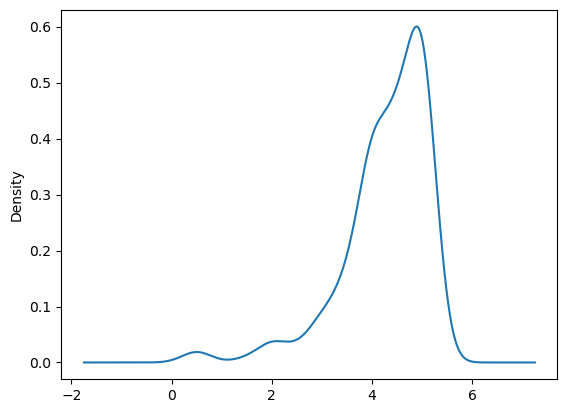

In [90]:
r['rating'].plot(kind='kde')

## Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings

In [36]:
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [37]:
ratings_grouped

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [42]:
merge = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

In [43]:
merge

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [44]:
filtered = merge[merge['count'] > 50]

In [45]:
filtered

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


## most popular movie based on  average user ratings

In [46]:
filtered['mean'].max()

4.429022082018927

In [47]:
filtered[filtered['mean'] == 4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


## top 5 popular movies based on number of user ratings

In [52]:
top_movies = filtered.sort_values(by='count', ascending=False)

In [53]:
top_movies

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


##  Sci-Fi movie is "third most popular" based on the number of user ratings

In [55]:
top_movies[top_movies['genres'].str.contains('Sci-Fi')].sort_values(by='count', ascending=False)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [56]:
links = pd.read_csv('links.csv')

In [57]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [58]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [59]:
links_df = pd.read_csv('links.csv')

In [92]:
highly_rated_movies = pd.merge(top_movies,links, on = 'movieId')
imdb_ratings_high_rated = pd.merge(top_movies,links, on = 'movieId')
highly_rated_movies

,movieId,title,genres,count,mean,imdbId,tmdbId
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134,109830,13.0
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068,110912,680.0
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290,102926,274.0
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0
...,...,...,...,...,...,...,...
431,4239,Blow (2001),Crime|Drama,51,3.813725,221027,4133.0
432,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118,139654,2034.0
433,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137,166924,1018.0
434,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098,112442,9737.0


## movieId of the movie which has the highest IMDB rating

In [85]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

import time
imdbrating ={}
for index, row in merge.iterrows():
    ratings=scrapper(row['imdbId'])
    if ratings:
        imdbrating[row['imdbId']] = ratings
    time.sleep(1)

imdb_df = pd.DataFrame({'IMDB_ID' : list(imdbrating.keys()), 'IMDB_Ratings' : list(imdbrating.values())})
ratings_df.to_csv('imdb_ratings_high_rated.csv', index=False)

In [98]:
imdb_ratings_high_rated = pd.read_csv('imdb_ratings_high_rated.csv')

In [96]:
imdb_ratings_high_rated[imdb_ratings_high_rated['imdbId'] == 111161]	

,movieId,title,genres,count,mean,imdbId,tmdbId
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0
